In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray
import glob
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import palettable
from palettable.colorbrewer.sequential import YlOrRd_9,RdPu_9
from palettable.colorbrewer.diverging import RdYlGn_10_r
from wrf import getvar, ALL_TIMES
from netCDF4 import Dataset

### Precip data

ok
ok
ok
ok
ok
ok
ok
ok


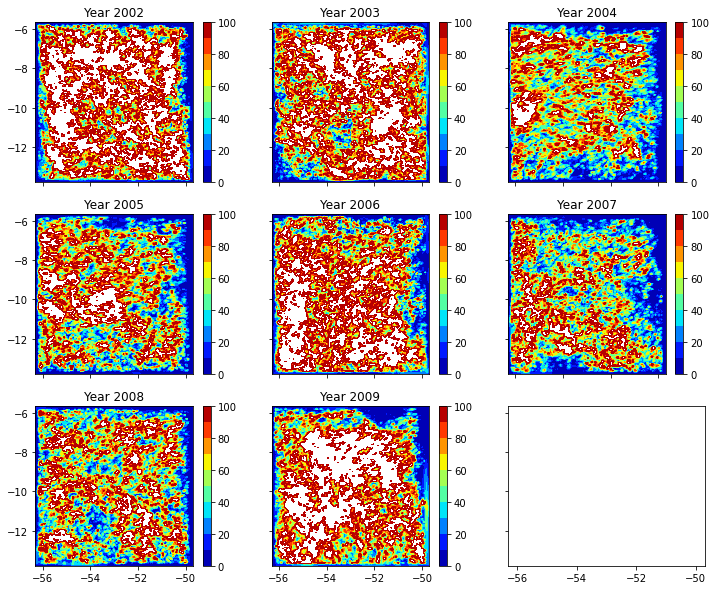

In [4]:
fig,axes = plt.subplots(3,3,figsize=(12,10),sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/'
file = path+'Xingu_2002/energyflux_d01_2002-11-10_00:00:00'
with xarray.open_dataset(file,decode_times=False,
                         mask_and_scale='True') as ds:
    lats=ds['XLAT'][0,:,0]
    lons=ds['XLONG'][0,0,:]
        
path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/'
for ii,year in enumerate(range(2002,2010)):
    file = path+'precip.'+str(year)+'.obs.nc'
    with xarray.open_dataset(file,decode_times=False,
                             mask_and_scale='True') as ds:
        print('ok')
        
    im=axes[ii].contourf(lons,lats,ds['RAINNC'][-1,:,:],cmap='jet',levels=np.arange(0,101,10))
    axes[ii].set_title('Year '+str(year))
    fig.colorbar(im,ax=axes[ii])

### LU_INDEX data

In [16]:
### load in the LU_INDEX
path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/'
year=2002
with xarray.open_dataset(path+'Xingu_'+str(year)+'_bigclearing/'+'/3Dfields_d01_'+str(year)+'-11-10_00:00:00',
                         decode_times=False,mask_and_scale='True') as ds:
    lu_index1=ds['LU_INDEX'][0,:,:]
with xarray.open_dataset(path+'Xingu_'+str(year)+'_mediumclearing/'+'/3Dfields_d01_'+str(year)+'-11-10_00:00:00',
                         decode_times=False,mask_and_scale='True') as ds:
    lu_index2=ds['LU_INDEX'][0,:,:]
with xarray.open_dataset(path+'Xingu_'+str(year)+'_smallclearing/'+'/3Dfields_d01_'+str(year)+'-11-10_00:00:00',
                         decode_times=False,mask_and_scale='True') as ds:
    lu_index3=ds['LU_INDEX'][0,:,:]

## Changes in Precip for big clearing

ok


Text(0.5, 1.0, 'Average of all')

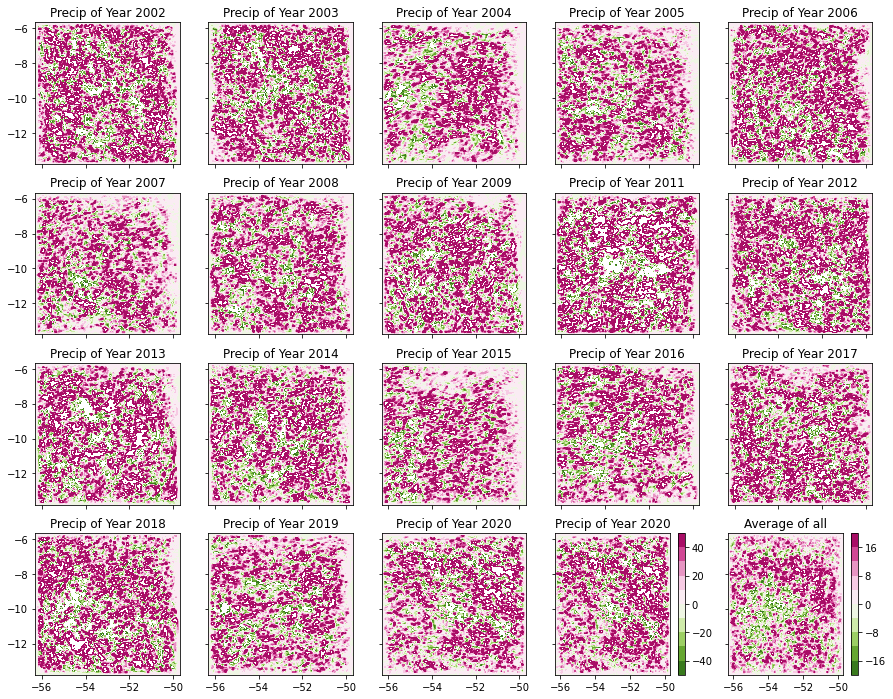

In [8]:
fig,axes = plt.subplots(4,5,figsize=(15,12),sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/'
file = path+'dif.precip.bigclearing.all.nc'
with xarray.open_dataset(file,decode_times=False,
                             mask_and_scale='True') as ds:
    print('ok')
        
years=np.concatenate((np.arange(2002,2010),np.arange(2011,2021)))
for ii,year in enumerate(years):
    im=axes[ii].contourf(lons,lats,ds['RAINNC'][ii,-1,:,:],cmap='PiYG_r',levels=np.arange(-50,51,10))
    axes[ii].set_title('Precip of Year '+str(year))

im=axes[18].contourf(lons,lats,ds['RAINNC'][ii,-1,:,:],cmap='PiYG_r',levels=np.arange(-50,51,10))
fig.colorbar(im,ax=axes[18])
axes[18].set_title('Precip of Year '+str(year))

im=axes[19].contourf(lons,lats,ds['RAINNC'][:,-1,:,:].mean(axis=0),cmap='PiYG_r',levels=np.arange(-20,21,4))
fig.colorbar(im,ax=axes[19])
axes[19].set_title('Average of all')

#for ii in range(20):
    #axes[ii].contour(lons,lats,lu_index1,colors='b',linewidths=0.5,levels=[11.5,12.5])


ok


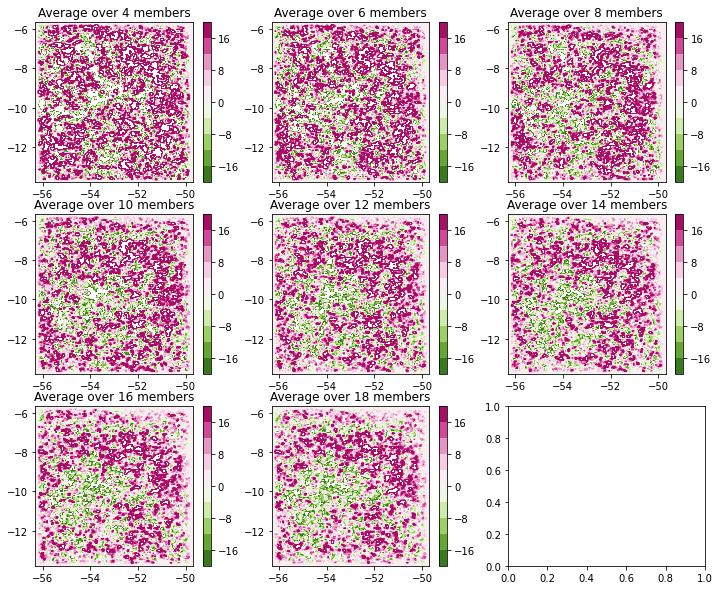

In [9]:
fig,axes = plt.subplots(3,3,figsize=(12,10))#,sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/'
file = path+'dif.precip.bigclearing.all.nc'
with xarray.open_dataset(file,decode_times=False,
                             mask_and_scale='True') as ds:
    print('ok')
        
for ii,jj in enumerate(np.arange(4,20,2)):
    im=axes[ii].contourf(lons,lats,ds['RAINNC'][0:jj,-1,:,:].mean(axis=0),cmap='PiYG_r',levels=np.arange(-20,21,4))
    axes[ii].set_title('Average over '+str(jj)+' members')
    fig.colorbar(im,ax=axes[ii])

ok
ok
ok
ok
ok
ok
ok
ok
ok


<ipython-input-17-5cc86d77621f>:23: UserWarning: The following kwargs were not used by contour: 'linewidth'
  axes[ii].contour(lons,lats,lu_index1,'-k',linewidth=2,levels=[11,13])


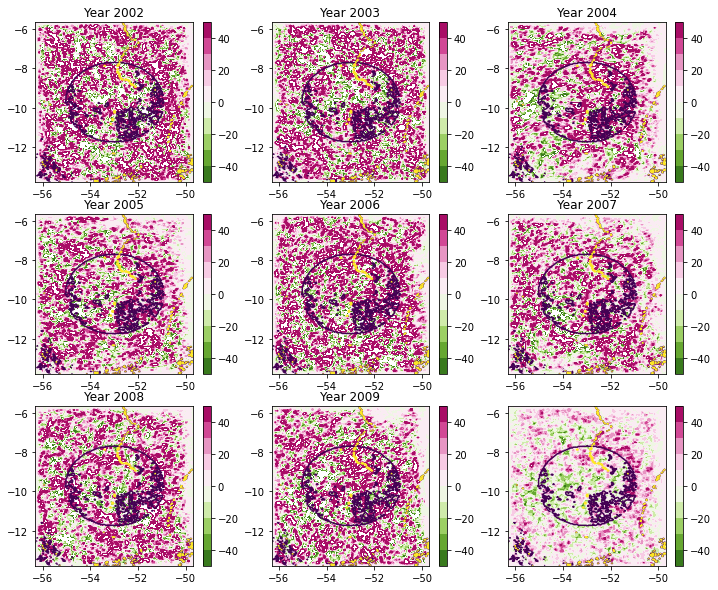

In [17]:
fig,axes = plt.subplots(3,3,figsize=(12,10))#,sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/'
for ii,year in enumerate(range(2002,2010)):
    file = path+'dif.precip.'+str(year)+'.bigclearing.nc'
    with xarray.open_dataset(file,decode_times=False,
                             mask_and_scale='True') as ds:
        print('ok')
     
    im=axes[ii].contourf(lons,lats,ds['RAINNC'][-1,:,:],cmap='PiYG_r',levels=np.arange(-50,51,10))
    axes[ii].set_title('Year '+str(year))
    fig.colorbar(im,ax=axes[ii])

file = path+'dif.precip.bigclearing.ensmean.nc'
with xarray.open_dataset(file,decode_times=False,
                            mask_and_scale='True') as ds:
    print('ok') 
    im=axes[8].contourf(lons,lats,ds['RAINNC'][16,:,:],cmap='PiYG_r',levels=np.arange(-50,51,10))
    fig.colorbar(im,ax=axes[8])

for ii in range(9):
    axes[ii].contour(lons,lats,lu_index1,'-k',linewidth=2,levels=[11,13])


## Changes in Precip for medium clearing

ok
ok
ok
ok
ok
ok
ok
ok
ok


<ipython-input-18-64e6874ab794>:23: UserWarning: The following kwargs were not used by contour: 'linewidth'
  axes[ii].contour(lons,lats,lu_index2,'-k',linewidth=2,levels=[11,13])


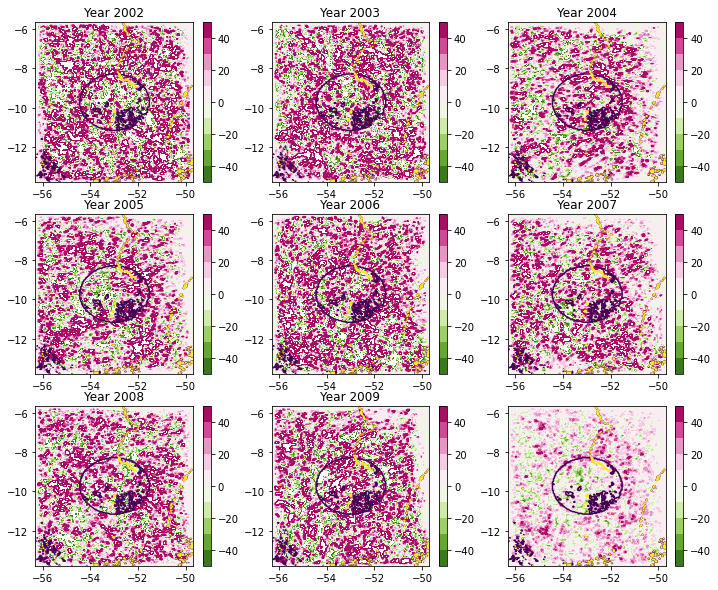

In [18]:
fig,axes = plt.subplots(3,3,figsize=(12,10))#,sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/'
for ii,year in enumerate(range(2002,2010)):
    file = path+'dif.precip.'+str(year)+'.mediumclearing.nc'
    with xarray.open_dataset(file,decode_times=False,
                             mask_and_scale='True') as ds:
        print('ok')
     
    im=axes[ii].contourf(lons,lats,ds['RAINNC'][-1,:,:],cmap='PiYG_r',levels=np.arange(-50,51,10))
    axes[ii].set_title('Year '+str(year))
    fig.colorbar(im,ax=axes[ii])

file = path+'dif.precip.mediumclearing.ensmean.nc'
with xarray.open_dataset(file,decode_times=False,
                            mask_and_scale='True') as ds:
    print('ok') 
    im=axes[8].contourf(lons,lats,ds['RAINNC'][16,:,:],cmap='PiYG_r',levels=np.arange(-50,51,10))
    fig.colorbar(im,ax=axes[8])
    
for ii in range(9):
    axes[ii].contour(lons,lats,lu_index2,'-k',linewidth=2,levels=[11,13])


### TSK